## Installing vsi2tif CLI and dependencies

In [ ]:
# Install JDK-8 and vips dependencies (here: Ubuntu Linux)
!sudo apt update
!sudo apt-get install openjdk-8-jdk
!sudo apt install libvips-tools

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Ign:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,499 kB]
Get:14 http://arch

In [ ]:
# Configure bftools
!wget http://downloads.openmicroscopy.org/latest/bio-formats5.6/artifacts/bftools.zip
!unzip bftools.zip

--2024-09-11 13:35:02--  http://downloads.openmicroscopy.org/latest/bio-formats5.6/artifacts/bftools.zip
Resolving downloads.openmicroscopy.org (downloads.openmicroscopy.org)... 134.36.65.239
Connecting to downloads.openmicroscopy.org (downloads.openmicroscopy.org)|134.36.65.239|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.openmicroscopy.org/latest/bio-formats5.6/artifacts/bftools.zip [following]
--2024-09-11 13:35:02--  https://downloads.openmicroscopy.org/latest/bio-formats5.6/artifacts/bftools.zip
Connecting to downloads.openmicroscopy.org (downloads.openmicroscopy.org)|134.36.65.239|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://downloads.openmicroscopy.org/bio-formats/5.6/artifacts/bftools.zip [following]
--2024-09-11 13:35:03--  https://downloads.openmicroscopy.org/bio-formats/5.6/artifacts/bftools.zip
Connecting to downloads.openmicroscopy.org (downloads.openmicroscopy.org)

In [ ]:
## Install vsi2tif from source
!pip install git+https://github.com/andreped/vsi2tif

  Cloning https://github.com/andreped/vsi2tif to /tmp/pip-req-build-3k4j3mhz
  Running command git clone --filter=blob:none --quiet https://github.com/andreped/vsi2tif /tmp/pip-req-build-3k4j3mhz
  Resolved https://github.com/andreped/vsi2tif to commit cd9f9c8e07797d571f64751c7eff7030abfa0871
  Preparing metadata (setup.py) ... done
  Created wheel for vsi2tif: filename=vsi2tif-0.1.5-py3-none-any.whl size=8854 sha256=c212a0a00765957ac00d88a21bfec3b818617a9c1dcf6e608f7d37c0af005e6e
  Stored in directory: /tmp/pip-ephem-wheel-cache-dtj9j72s/wheels/2b/10/dc/602754b67e80ad12b7fd6fe0a99d94f7beefe70cb7a50f4da9
Successfully built vsi2tif


## Download test sample and convert single image

In [ ]:
# Download test sample
!wget https://openslide.cs.cmu.edu/download/openslide-testdata/Olympus/OS-2.zip
!unzip OS-2.zip

--2024-09-11 13:35:50--  https://openslide.cs.cmu.edu/download/openslide-testdata/Olympus/OS-2.zip
Resolving openslide.cs.cmu.edu (openslide.cs.cmu.edu)... 128.2.209.93
Connecting to openslide.cs.cmu.edu (openslide.cs.cmu.edu)|128.2.209.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 309552104 (295M) [application/zip]
Saving to: ‘OS-2.zip’

OS-2.zip            100%[===================>] 295.21M   841KB/s    in 3m 51s  

2024-09-11 13:39:42 (1.28 MB/s) - ‘OS-2.zip’ saved [309552104/309552104]

Archive:  OS-2.zip
  inflating: OS-2.vsi                
   creating: _OS-2_/
   creating: _OS-2_/stack10001/
  inflating: _OS-2_/stack10001/frame_t.ets  
   creating: _OS-2_/stack1/
  inflating: _OS-2_/stack1/frame_t.ets  


In [ ]:
# Test that vsi2tif tool can be accessed from terminal
!vsi2tif -h

usage: vsi2tif [-h] -i INPUT -o OUTPUT -b BFCONVERT [-c COMPRESSION] [-s TILESIZE] [-q QUALITY]
               [-m MAX_MEM] [-v VERBOSE] [--remove-name-spaces] [-p PLANE]

vsi2tif - simple tool for converting images from cellSens VSI to Generic TIFF

options:
  -h, --help            show this help message and exit
  -i INPUT, --input INPUT
                        folder with input files
  -o OUTPUT, --output OUTPUT
                        folder for output files
  -b BFCONVERT, --bfconvert BFCONVERT
                        path to bfconvert tool
  -c COMPRESSION, --compression COMPRESSION
                        compression technique for final image - default 'jpeg'
  -s TILESIZE, --tilesize TILESIZE
                        tile size to use during both conversion steps - default 1024
  -q QUALITY, --quality QUALITY
                        compression quality used with JPEG compression - default 87
  -m MAX_MEM, --max-mem MAX_MEM
                        set maximum memory in the java vm

In [ ]:
# Convert a single WSI to Generic TIFF with reduced verbosity
!vsi2tif -i ./OS-2.vsi -o ./OS-2.tif -b bftools/bfconvert -v 0

INFO:root:Performing single conversion...
Processing took 54.060 seconds


## Using converted image with OpenSlide

In [ ]:
# Install OpenSlide binaries
!brew install openslide
!pip install openslide-bin

/bin/bash: line 1: brew: command not found
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 9.9 MB/s eta 0:00:00


In [ ]:
# Install Python OpenSlide SDK and Matplotlib for visualization
!pip install openslide-python matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.0/359.0 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for openslide-python: filename=openslide_python-1.3.1-cp310-cp310-linux_x86_64.whl size=33552 sha256=8606135e8e594bb068220d3f5a5269785408bb1917550430e0f69590d1aa2394
  Stored in directory: /root/.cache/pip/wheels/79/79/fa/29a0087493c69dff7fd0b70fab5d6771002a531010161d2d97
Successfully built openslide-python


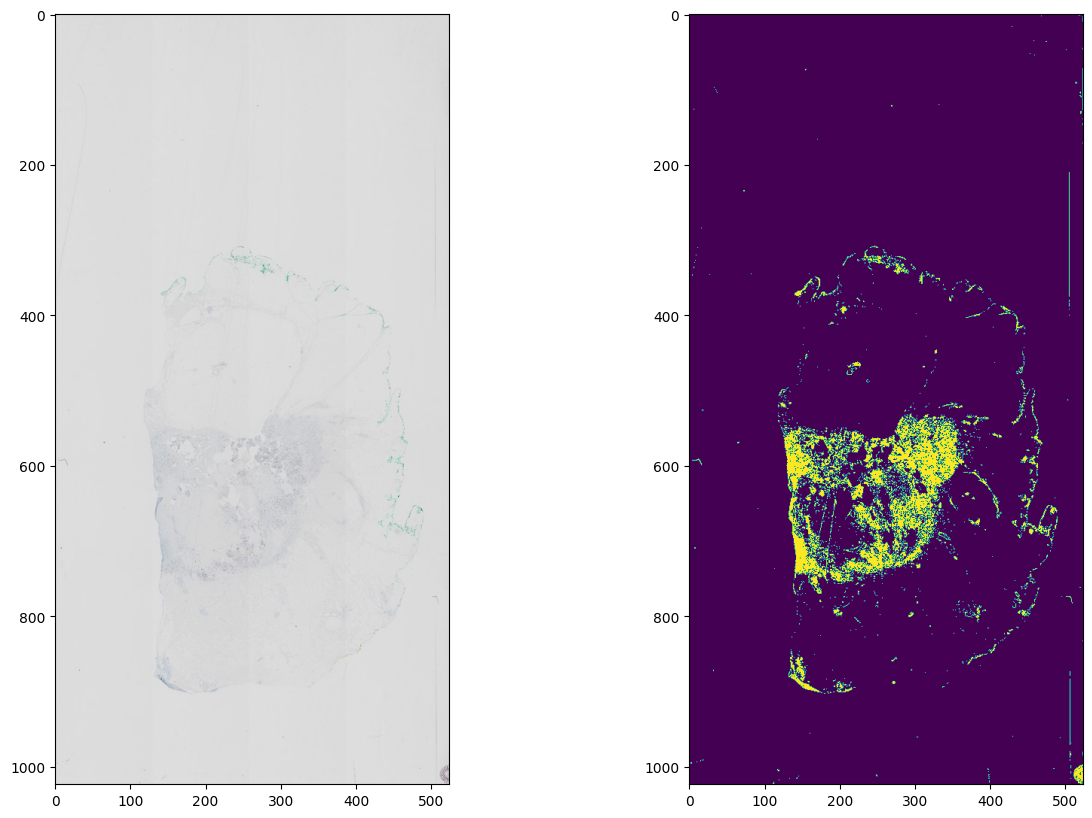

In [ ]:
import openslide_bin
import openslide as ops
import matplotlib.pyplot as plt
import numpy as np

image = ops.OpenSlide('OS-2.tif')
thumbnail = image.get_thumbnail(size=(1024, 1024))
thresh = (np.mean(np.asarray(thumbnail), axis=-1) < 210).astype("uint8")

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(thumbnail)
ax[1].imshow(thresh)